In [55]:
import pandas as pd
import numpy as np

df=pd.read_csv('house_data_fs.csv', index_col = 0)
df = df.dropna()
df1 = df.head(50)

### Linear regression model using a single feature

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
model = lr.fit(X_scaled, y)

### Visualization for Linear Regression model

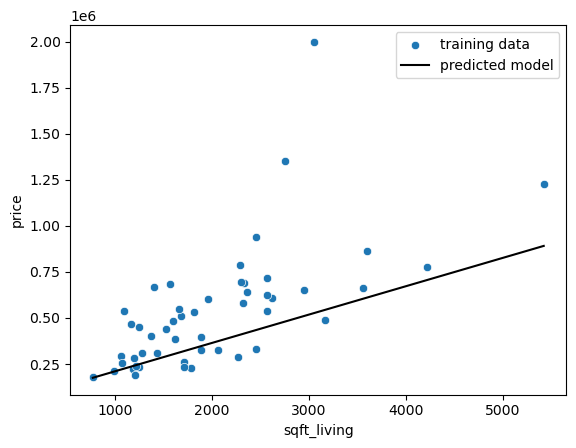

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

### Polynomial regression :
1) Feature scaling and Transform poly features 
2) model using a linear regression. 
3) Predict using the Model 

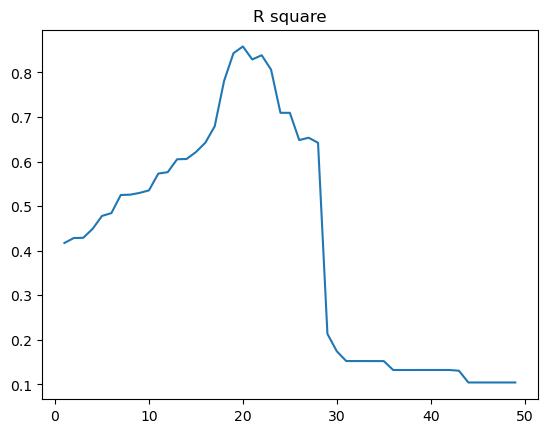

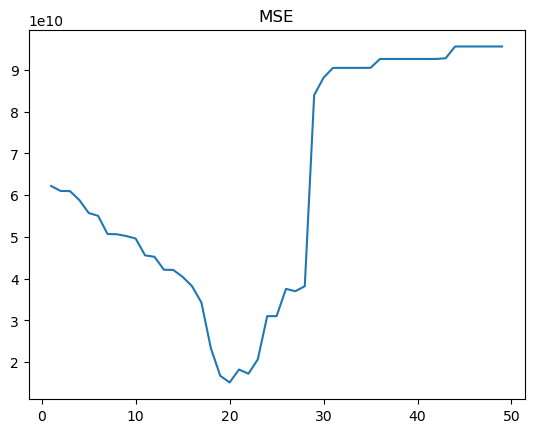

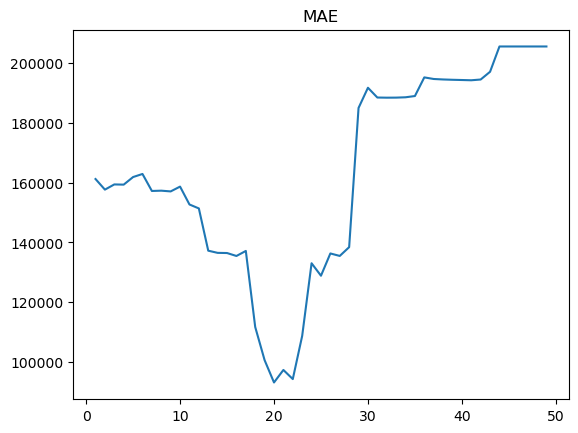

In [61]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation 
orders = range(1,50)
r2list=[]
mse_list=[]
mae_list=[]

for d in orders:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    # Modeling.
    lr = LinearRegression()
    model = lr.fit(poly_features, y)
    
    #Prediction
    Y_pred = model.predict(poly_features)
    rscore = model.score(poly_features, y)
    mse = mean_squared_error(y, Y_pred)
    mae = mean_absolute_error(y, Y_pred)
    r2list.append(rscore)
    mse_list.append(mse)
    mae_list.append(mae)

plt.plot(orders,r2list)
plt.title('R square')
plt.show()
plt.plot(orders,mse_list)
plt.title('MSE')
plt.show()
plt.plot(orders,mae_list)
plt.title('MAE')
plt.show()

### Saving Best Model for Deployment

In [80]:
import joblib
best_order = 25
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    
lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)
print('r2-score:', (rscore), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))

r2-score: 0.5353053321427759 
mean squared error: 49596225122.0 
mean absolute error: 158636.0


### Visualization for Poly regression

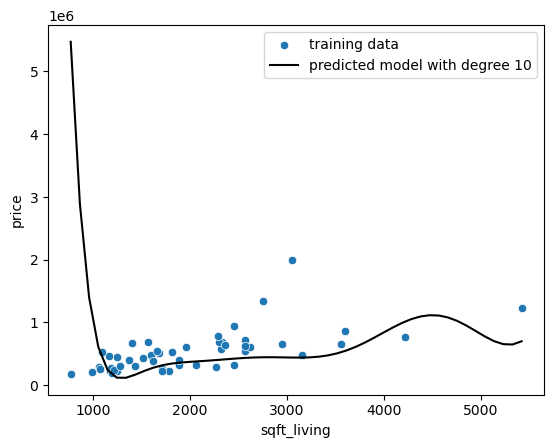

In [83]:
sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

x_model_poly  = poly.fit_transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model with degree ' + str(best_order)])
plt.show()